# Business Objective

Use a classification model inorder to predict if a credit card transaction is fraudulent or not

# Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import random
import sklearn
from collections import Counter

In [2]:
df = pd.read_csv("fraud_data.csv")

In [3]:
pd.set_option('display.max_columns', None)

df.head(3)

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2994681,0,242834,25.000,H,9803,583.0,150.0,visa,226.0,credit,269.0,87.0,NaN,NaN,yahoo.com,NaN,1,1,0,0,0,1,0,1,0,1,1,0,1,1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,7.791666,0.791666,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,15.0,136.0,0.0,0.0,0.0,0.0,1822.0,47.0,64.0,0.0,0.0,0.0,0.0,0.0,0.0,15951.99023,198853.7656,0.0,0.0,0.0,915.0,5975.0,1320.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,82050.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,100.0,NotFound,NaN,-300.0,Found,Found,166.0,NaN,529.0,178.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,Mac OS X 10.12,firefox 56.0,24.0,1920x1080,match_status:2,T,F,T,T,desktop,rv:56.0
1,3557242,0,15123000,117.000,W,7919,19

Categorical Features – Transaction

ProductCD – Product code
card1 - card6 : payment card information, such as card type, card category, issue bank, country, etc.
addr1, addr2
P_emaildomain – Purchaser
R_emaildomain- Recipient
M1 - M9 – Match between names on card and address etc.

Categorical Features - Identity
DeviceType
DeviceInfo
id_12 - id_38 customer identity variables
The TransactionDT feature is a timedelta from a given reference datetime (not an actual timestamp buth rather a duration).

Outcome/Target Variable – isFraud

whether transaction is fraud or not

In [4]:
# check the number rows and columns of the dataset
df.shape

(59054, 434)

# Train Test Split

In [5]:
# set x and y variables
y = df['isFraud']
x= df.loc[:, df.columns != 'isFraud']


from sklearn.model_selection import train_test_split

# Split randomly into 80% train data and 20% test data
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = 0.2, random_state = 123)

In [6]:
xTrain.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47243 entries, 10396 to 52734
Columns: 433 entries, TransactionID to DeviceInfo
dtypes: float64(385), int64(17), object(31)
memory usage: 156.4+ MB


# EDA and Data Preparation

In [7]:
missing_percentage = df.isnull().mean() * 100
missing_percentage

TransactionID      0.000000
isFraud            0.000000
TransactionDT      0.000000
TransactionAmt     0.000000
ProductCD          0.000000
                    ...    
id_36             75.945745
id_37             75.945745
id_38             75.945745
DeviceType        75.979612
DeviceInfo        79.813391
Length: 434, dtype: float64

In [8]:
# Eliminate automatically variables with more than 20% of missingness

df = df[df.columns[missing_percentage < 20]]

In [9]:
missing_cols=xTrain.columns[xTrain.isnull().mean() > 0]
print(missing_cols)

Index(['card2', 'card3', 'card4', 'card5', 'card6', 'addr1', 'addr2', 'dist1',
       'dist2', 'P_emaildomain',
       ...
       'id_31', 'id_32', 'id_33', 'id_34', 'id_35', 'id_36', 'id_37', 'id_38',
       'DeviceType', 'DeviceInfo'],
      dtype='object', length=414)


In [10]:
xTrain_single= xTrain
cols= xTrain_single.columns
num_cols = xTrain_single.select_dtypes(include=np.number).columns
xTrain_single.loc[:,num_cols]=xTrain_single.loc[:,num_cols].fillna(xTrain_single.loc[:,num_cols].mean())
print(num_cols)
print(xTrain_single.loc[:,num_cols].mean())

Index(['TransactionID', 'TransactionDT', 'TransactionAmt', 'card1', 'card2',
       'card3', 'card5', 'addr1', 'addr2', 'dist1',
       ...
       'id_17', 'id_18', 'id_19', 'id_20', 'id_21', 'id_22', 'id_24', 'id_25',
       'id_26', 'id_32'],
      dtype='object', length=402)
TransactionID     3.281991e+06
TransactionDT     7.362598e+06
TransactionAmt    1.341243e+02
card1             9.913391e+03
card2             3.627611e+02
                      ...     
id_22             1.547932e+01
id_24             1.279740e+01
id_25             3.227634e+02
id_26             1.487689e+02
id_32             2.652543e+01
Length: 402, dtype: float64


In [11]:
cat_cols= list(set(cols) - set(num_cols))
xTrain_single.loc[:,cat_cols] = xTrain_single.loc[:,cat_cols].fillna(xTrain.loc[:,cat_cols].mode().iloc[0])
train_cols = xTrain_single.columns
print(cat_cols)
print(xTrain_single.loc[:,cat_cols].mode().iloc[0])

['id_38', 'id_15', 'id_29', 'M7', 'R_emaildomain', 'M5', 'P_emaildomain', 'id_16', 'M1', 'id_12', 'id_30', 'id_33', 'ProductCD', 'id_36', 'card4', 'id_23', 'id_37', 'M2', 'card6', 'M6', 'M3', 'id_28', 'DeviceInfo', 'id_34', 'M9', 'M8', 'id_31', 'id_35', 'id_27', 'DeviceType', 'M4']
id_38                               F
id_15                           Found
id_29                           Found
M7                                  F
R_emaildomain               gmail.com
M5                                  F
P_emaildomain               gmail.com
id_16                           Found
M1                                  T
id_12                        NotFound
id_30                      Windows 10
id_33                       1920x1080
ProductCD                           W
id_36                               F
card4                            visa
id_23            IP_PROXY:TRANSPARENT
id_37                               T
M2                                  T
card6                           d

In [12]:
xTrain_single.columns[xTrain_single.isnull().mean() > 0] # select those variables with missing values

Index([], dtype='object')

In [13]:
# checking duplicates
duplicates = xTrain.duplicated().sum()
duplicates

0

In [14]:
# describe object features
xTrain.describe(include='object')

,ProductCD,card4,card6,P_emaildomain,R_emaildomain,M1,M2,M3,M4,M5,M6,M7,M8,M9,id_12,id_15,id_16,id_23,id_27,id_28,id_29,id_30,id_31,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
count,47243,47243,47243,47243,47243,47243,47243,47243,47243,47243,47243,47243,47243,47243,47243,47243,47243,47243,47243,47243,47243,47243,47243,47243,47243,47243,47243,47243,47243,47243,47243
unique,5,4,4,59,58,2,2,2,3,2,2,2,2,2,2,3,2,3,1,2,2,71,102,103,3,2,2,2,2,2,720
top,W,visa,debit,gmail.com,gmail.com,T,T,T,M0,F,F,F,F,T,NotFound,Found,Found,IP_PROXY:TRANSPARENT,Found,Found,Found,Windows 10,chrome 63.0,1920x1080,match_status:2,T,F,T,F,desktop,Windows
freq,35034,30787,35384,25931,40800,47242,44582,41843,38238,38611,31913,44599,40134,44234,45532,41338,42179,47117,47243,42014,41915,42724,37715,42732,45807,42077,46682,44773,41816,42732,41498


In [15]:
# describe numeric features
xTrain.describe()

,TransactionID,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,dist1,dist2,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_13,id_14,id_17,id_18,id_19,id_20,id_21,id_22,id_24,id_25,id_26,id_32
count,4.724300e+04,4.724300e+04,47243.000000,47243.000000,47243.000000,47243.000000,47243.000000,47243.000000,47243.000000,47243.000000,47243.000000,47243.000000,47243.000000,47243.000000,47243.000000,47243.000000,47243.000000,47243.000000,47243.000000,47243.000000,47243.000000,47243.000000,47243.000000,47243.000000,47243.000000,47243.000000,47243.000000,47243.000000,47243.000000,47243.000000,47243.000000,47243.000000,47243.000000,47243.000000,47243.000000,47243.000000,47243.000000,47243.000000,47243.000000,47243.000000,47243.0,47243.000000,47243.000000,47243.000000,47243.000000,47243.000000,47243.000000,47243.000000,47243.000000,47243.000000,47243.000000,47243.000000,47243.000000,47243.000000,47243.000000,47243.000000,47243.000000,47243.000000,47243.000000,47243.000000,47243.000000,47243.000000,47243.000000,47243.000000,47243.000000,47243.000000,47243.000000,47243.00000,47243.000000,47243.000000,47243.000000,47243.000000,47243.000000,47243.000000,47243.000000,47243.000000,47243.000000,47243.000000,47243.000000,47243.000000,47243.000000,47243.000000,47243.000000,47243.000000,47243.000000,47243.000000,47243.000000,47243.000000,47243.000000,47243.000000,47243.000000,47243.000000,47243.000000,47243.000000,47243.000000,47243.000000,47243.000000,47243.000000,47243.000000,47243.000000,47243.000000,47243.000000,47243.000000,47243.000000,47243.000000,47243.000000,47243.000000,47243.000000,47243.000000,47243.000000,47243.000000,47243.000000,47243.000000,47243.000000,47243.000000,47243.000000,47243.000000,47243.000000,47243.000000,47243.000000,47243.000000,47243.000000,47243.000000,47243.000000,47243.000000,47243.00000,47243.000000,47243.000000,47243.000000,47243.000000,47243.000000,47243.000000,47243.000000,47243.000000,47243.000000,47243.000000,47243.000000,47243.000000,47243.000000,47243.000000,47243.000000,47243.000000,47243.000000,47243.000000,47243.000000,47243.000000,47243.000000,47243.000000,47243.000000,47243.000000,47243.000000,47243.000000,47243.000000,47243.000000,47243.000000,47243.000000,47243.000000,47243.000000,47243.000000,47243.000000,47243.

# One Hot Encoding

In [16]:
xTrain.info()
xTrain_dummy = pd.get_dummies(xTrain, prefix_sep='_', drop_first=True)

<class 'pandas.core.frame.DataFrame'>
Index: 47243 entries, 10396 to 52734
Columns: 433 entries, TransactionID to DeviceInfo
dtypes: float64(385), int64(17), object(31)
memory usage: 156.4+ MB


In [17]:
final_tr = pd.DataFrame(data=xTrain_dummy)

print(final_tr.shape)

(47243, 1544)


In [18]:
from sklearn.utils import resample

# Concatenate 'final_tr' and 'yTrain' along the columns axis
data = pd.concat([final_tr, yTrain], axis=1)

# Separate the majority and minority classes
majority_class = data[data['isFraud'] == 0]  # Assuming the majority class is labeled as 0
minority_class = data[data['isFraud'] == 1]  # Assuming the minority class is labeled as 1

# Upsample the minority class to match the majority class
minority_upsampled = resample(minority_class, 
                              replace=True,     # Sample with replacement
                              n_samples=len(majority_class),   # Match the number of samples in the majority class
                              random_state=42)  # Set a random seed for reproducibility

# Combine the upsampled minority class with the majority class
resampled_data = pd.concat([majority_class, minority_upsampled])

# Separate the features (X) and labels (y) from the resampled data
X_resampled = resampled_data.drop('isFraud', axis=1)
y_resampled = resampled_data['isFraud']

# Print the resampled data
print(X_resampled.head())
print(y_resampled.head())

       TransactionID  TransactionDT  TransactionAmt  card1  card2  card3  \
10396        3422370       11025081           22.44   4461  375.0  185.0   
52309        3271323        6976470           19.95   9112  250.0  150.0   
41034        3266795        6813845           49.00   6697  111.0  150.0   
50727        3420224       10955494          108.95   4356  555.0  150.0   
42242        3536499       14507553          117.00   7103  555.0  150.0   

       card5  addr1  addr2       dist1       dist2  C1  C2  C3  C4  C5  C6  \
10396  224.0  130.0   60.0  117.667688  219.600322   5  12   0   2   0   2   
52309  226.0  441.0   87.0    2.000000  219.600322   1   1   0   0   1   1   
41034  195.0  299.0   87.0    0.000000  219.600322   1   1   0   0   0   1   
50727  226.0  299.0   87.0    1.000000  219.600322   8   7   0   0   2   2   
42242  226.0  264.0   87.0  117.667688  219.600322   1   1   0   0   0   1   

       C7  C8  C9  C10  C11  C12  C13  C14     D1          D2          D3 

In [19]:
from sklearn.utils import resample

# Assuming you have the training set in a DataFrame called 'final_tr'
# and the corresponding labels in a DataFrame called 'yTrain'

# Concatenate 'final_tr' and 'yTrain' along the columns axis
data = pd.concat([final_tr, yTrain], axis=1)

# Separate the majority and minority classes
majority_class = data[data['isFraud'] == 0]  # Assuming the majority class is labeled as 0
minority_class = data[data['isFraud'] == 1]  # Assuming the minority class is labeled as 1

# Upsample the minority class to match the majority class
minority_upsampled = resample(minority_class, 
                              replace=True,     # Sample with replacement
                              n_samples=len(majority_class) if len(minority_class) > 0 else 1,   # Match the number of samples in the majority class, or set to 1 if the minority class is empty
                              random_state=42)  # Set a random seed for reproducibility

# Combine the upsampled minority class with the majority class
resampled_data = pd.concat([majority_class, minority_upsampled])

# Separate the features (X) and labels (y) from the resampled data
X_resampled = resampled_data.drop('isFraud', axis=1)
y_resampled = resampled_data['isFraud']

# Print the resampled data
print(X_resampled.head())
print(y_resampled.head())

       TransactionID  TransactionDT  TransactionAmt  card1  card2  card3  \
10396        3422370       11025081           22.44   4461  375.0  185.0   
52309        3271323        6976470           19.95   9112  250.0  150.0   
41034        3266795        6813845           49.00   6697  111.0  150.0   
50727        3420224       10955494          108.95   4356  555.0  150.0   
42242        3536499       14507553          117.00   7103  555.0  150.0   

       card5  addr1  addr2       dist1       dist2  C1  C2  C3  C4  C5  C6  \
10396  224.0  130.0   60.0  117.667688  219.600322   5  12   0   2   0   2   
52309  226.0  441.0   87.0    2.000000  219.600322   1   1   0   0   1   1   
41034  195.0  299.0   87.0    0.000000  219.600322   1   1   0   0   0   1   
50727  226.0  299.0   87.0    1.000000  219.600322   8   7   0   0   2   2   
42242  226.0  264.0   87.0  117.667688  219.600322   1   1   0   0   0   1   

       C7  C8  C9  C10  C11  C12  C13  C14     D1          D2          D3 

In [20]:
## Decision Tree using grid search CV
from sklearn import tree
from sklearn.model_selection import GridSearchCV
parameters = {'max_depth':range(3,20)}
clf = GridSearchCV(tree.DecisionTreeClassifier(), parameters, n_jobs=4,cv=5,scoring = 'roc_auc')
clf.fit(X=X_resampled, y=y_resampled)
dt = clf.best_estimator_ #final decision tree!
print (clf.best_score_, clf.best_params_)

0.9700998645583029 {'max_depth': 19}


In [ ]:
#pip install graphviz

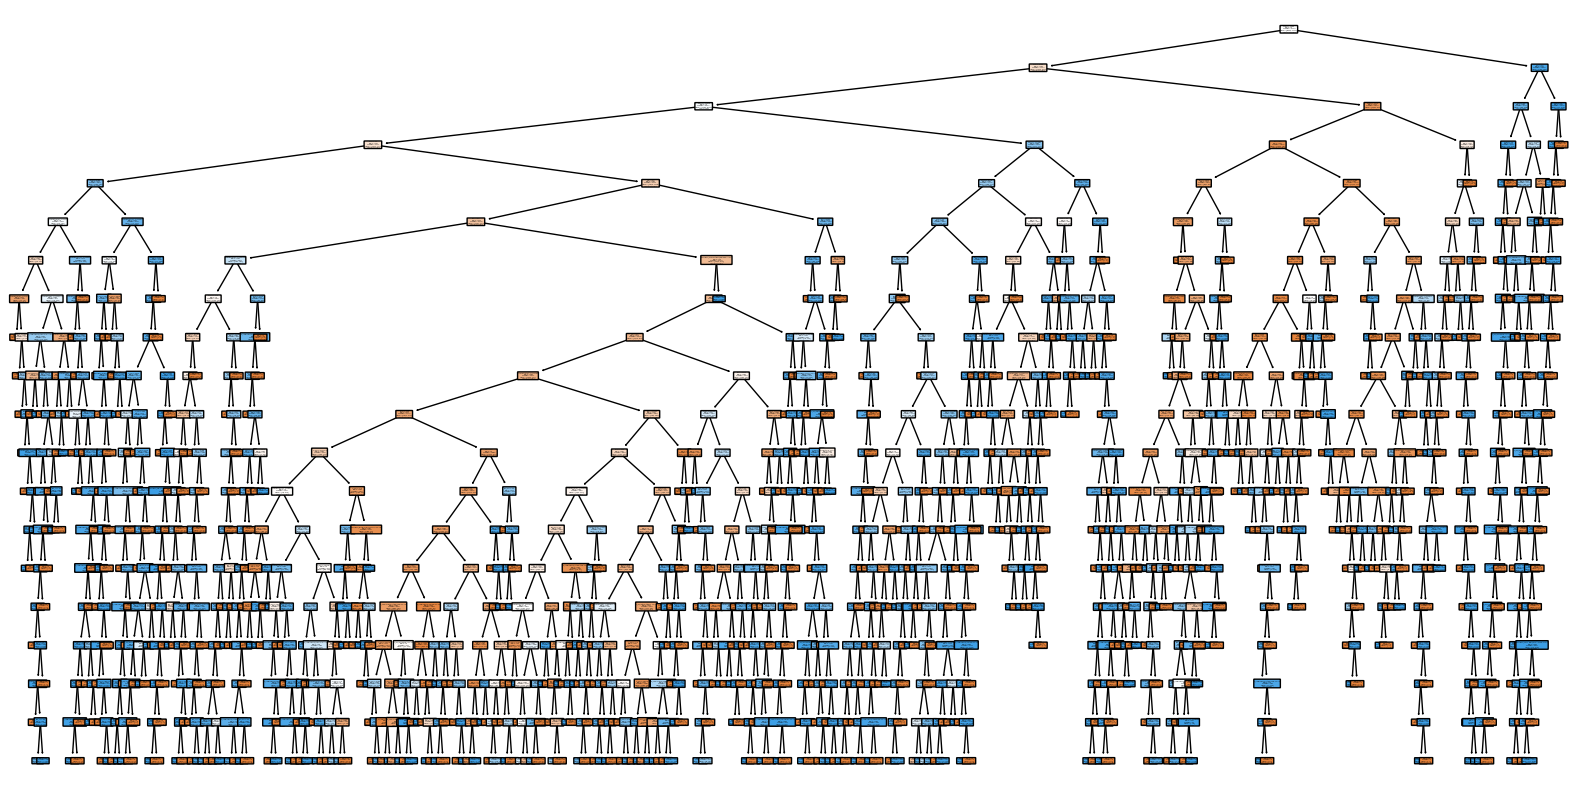

In [24]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Plotting the decision tree
plt.figure(figsize=(20, 10))
plot_tree(dt, filled=True, feature_names=X_resampled.columns, class_names=['Not Fraud', 'Fraud'], rounded=True)
plt.show()